In [1]:
import random                  # Numpy has a built in 'random' function. Importing both is redundant
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import requests # Import the requests library. 6.2.3
from config import weather_api_key # Import the API key. 6.2.3

In [2]:
# 6.1.4 Generate random latitudes and longitudes
# Create random integer between -90 and 90
random.randint(-90,90)

-9

In [3]:
# Get a single floating-point decimal number betweem 0 and 1.0
random.random()

0.2376064543693599

In [4]:
# Generate latitudes between -90 and 89 - too long of a script
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

[4.516295076470039,
 7.03573515722991,
 -56.73278241322588,
 11.315958897275857,
 47.12037207268057,
 -77.19442375129115,
 80.97238069041722,
 66.14866313566652,
 35.41225876778627,
 -63.20695801216927]

In [5]:
# Use randrange() - Add lower and upper limit in parentheses, 'step' parameter are incriments
random.randrange(-90, 90, step=1)

37

In [6]:
# Use uniform() - Generate a floating-point decimal number between two numbers
random.uniform(-90, 90)

-8.176854953829718

In [7]:
# Chain the NumPy module to the random module to create an array of latitudes or longitudes
np.random.uniform(-90, 90)

-53.97025676897947

In [8]:
# BEST METHOD
import timeit                  # Test how long piece of code or function takes to run

%timeit np.random.uniform(-90.000, 90.000, size=1500)         # Output is the amount of time it took to run the code for 7 runs and 1,000 loops per run



12.7 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
# While loop vs np.random.uniform() - this code is much slower than np.random.uniform()
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

# Call the function with 1500.
%timeit latitudes(1500)

1.32 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
# Create a set of random latitude and longitude combinations - USING np.random.uniform
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # zip objects into a list
lat_lngs

In [11]:
# Add lats/longs to a list - Once this is done we can iterate through the list of tuples and find nearest city
coordinates = list(lat_lngs)

In [12]:
# 6.1.5 - Generate Random World Cities
# Match the newly generate coordinates up with cities

# Citipy module
from citipy import citipy
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hobart au
luderitz na
varniai lt
taolanaro mg
bengkulu id
rikitea pf
touros br
yar-sale ru
chokurdakh ru
tomohon id
dikson ru
mataura pf
ushuaia ar
punta arenas cl
esterhazy ca
albany au
lake havasu city us
mangochi mw
ancud cl
punta arenas cl
hudson bay ca
albany au
tasiilaq gl
new norfolk au
torbay ca
manggar id
benghazi ly
ponta do sol cv
hithadhoo mv
qaanaaq gl
attawapiskat ca
cayenne gf
den helder nl
maldonado uy
selma us
dikson ru
mataura pf
ushuaia ar
mataura pf
punta arenas cl
mataura pf
bredasdorp za
mataura pf
mocajuba br
homer us
hithadhoo mv
puerto ayora ec
chingirlau kz
ushuaia ar
sarakhs ir
la cruz mx
los llanos de aridane es
butaritari ki
vaini to
ribeira grande pt
vanimo pg
new norfolk au
port alfred za
ushuaia ar
itaituba br
severo-kurilsk ru
kita ml
kismayo so
jamestown sh
sitka us
rikitea pf
belaya gora ru
upernavik gl
hermanus za
constitucion cl
atasu kz
hilo us
nikolskoye ru
bethel us
filadelfia py
bartica gy
bluff nz
amderma ru
yatou cn
moerai pf
kepno pl
saint-ge

In [13]:
# Iterate through our zipped lat_lngs tuple and find the nearest city
# When city is found, we'll add it to a list

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    # We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, 
    # which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [14]:
# 6.2.3 - Understanding API's - Register for an API Key - Make an API Call
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [16]:
# 6.2.4 Make a Request for Data to an API
# Make a Get request for the city weather using the get() Method
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [17]:
# Decide on data format (text, JSON, XML or HTML)
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"base":"stations","main":{"temp":54.55,"feels_like":53.62,"temp_min":50.95,"temp_max":58.14,"pressure":1016,"humidity":83},"visibility":10000,"wind":{"speed":8.05,"deg":220},"rain":{"1h":0.2},"clouds":{"all":100},"dt":1651001357,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1650966378,"sunset":1651016247},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [18]:
# Get the JSON text of the 'Get' request.
# With JSON method it is a lot easier to see the overall structure of the data, which will make it easier to retrieve data such as temperature and humidity.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 54.55,
  'feels_like': 53.62,
  'temp_min': 50.95,
  'temp_max': 58.14,
  'pressure': 1016,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 220},
 'rain': {'1h': 0.2},
 'clouds': {'all': 100},
 'dt': 1651001357,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650966378,
  'sunset': 1651016247},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Handle request errors

city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
# conditional expression that will evaluate whether the status code is equal to 200. 
# If it is, then we can print out a statement that says the weather data was found. 
# If there is a response other than 200, we can print out a statement that says the weather was not found
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [20]:
# 6.2.5 Parse a Response from an API
# Assign city_weather.json() to a variable
boston_data = city_weather.json()

In [21]:
# use sys key to get the corresponding value
boston_data['sys']['country']

'US'

In [22]:
# Retrieve date in weather data (see json above)
boston_data['dt']

# Convert the Date Timestamp
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S') # .strftime('%Y-%m-%d %H:%M:%S') converts it to more legible format

'2022-04-26 19:29:17'

In [23]:
# Using similar syntax to get the time of day, we can get the latitude, longitude, 
# maximum temperature, humidity, percent cloudiness, and wind speed
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 58.14 83 100 8.05


In [24]:
# 6.2.6 - Get the City Weather Data

# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#           Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following: 
#           City, country, and date
#           Latitude and longitude
#           Maximum temperature
#           Humidity
#           Cloudiness
#           Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


In [25]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
import time
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

# 2. Loop Through the List of Cities and Build the City URL
# Every time we want to reference the city in our code, we need to use the indexing on the cities list. U
# nfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. 
# To fix this issue, we need to create another for loop to get the city from the cities list.
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. 

# Let's use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
#                       If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. 
#                       However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
#                       This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.




# Handle API Request Errors with try-except Blocks

# Run an API request for each of the cities.
    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | varniai
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | tomohon
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | esterhazy
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lake havasu city
Processing Record 18 of Set 1 | mangochi
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | hudson bay
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | new norfolk
Processing Rec

In [26]:
# 6.2.7 - Create a DataFrame of City Weather Date

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
583,Mazamari,-11.3258,-74.5308,88.57,50,100,3.22,PE,2022-04-26 19:48:12
584,Iracoubo,5.4802,-53.2011,81.39,80,100,9.01,GF,2022-04-26 19:48:13
585,Baillif,16.0202,-61.7463,82.63,61,100,4.99,GP,2022-04-26 19:48:13
586,Duluth,46.7833,-92.1066,37.08,52,100,13.80,US,2022-04-26 19:48:13
587,Karaton,-6.3424,106.1045,75.52,92,100,2.01,ID,2022-04-26 19:48:14
588,Qasigiannguit,68.8193,-51.1922,35.85,87,100,12.91,GL,2022-04-26 19:48:14
589,Copiapo,-27.3667,-70.3333,62.29,43,42,6.89,CL,2022-04-26 19:43:21
590,Longonjo,-12.9067,15.2533,66.72,67,89,3.56,AO,2022-04-26 19:48:14
591,Sao Jose Da Coroa Grande,-8.8978,-35.1478,79.12,73,10,10.27,BR,2022-04-26 19:48:15
592,Hvolsvollur,63.7533,-20.2243,47.07,73,100,5.01,IS,2022-04-26 19:48:15


In [27]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-04-26 19:33:01,-42.8794,147.3294,49.05,94,92,6.91
1,Luderitz,NA,2022-04-26 19:33:02,-26.6481,15.1594,67.32,41,0,9.19
2,Varniai,LT,2022-04-26 19:33:02,55.7406,22.3644,39.61,87,45,6.49
3,Bengkulu,ID,2022-04-26 19:33:02,-3.8004,102.2655,77.47,89,53,5.44
4,Rikitea,PF,2022-04-26 19:33:03,-23.1203,-134.9692,78.15,74,100,22.57
5,Touros,BR,2022-04-26 19:33:03,-5.1989,-35.4608,81.18,75,7,14.32
6,Yar-Sale,RU,2022-04-26 19:33:03,66.8333,70.8333,29.53,95,100,19.46
7,Chokurdakh,RU,2022-04-26 19:33:04,70.6333,147.9167,4.95,98,100,6.42
8,Tomohon,ID,2022-04-26 19:33:04,1.3346,124.8392,68.94,90,99,1.68
9,Dikson,RU,2022-04-26 19:33:05,73.5069,80.5464,2.61,98,94,9.75


In [28]:
# Create an output file to save the DataFrame as a CSV
output_data_file = "../Practice/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# 6.3.1 - Plot Latitude vs Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Needs current date in title
# Import the time module.
import time
today = time.strftime("%x")
today

'04/26/22'

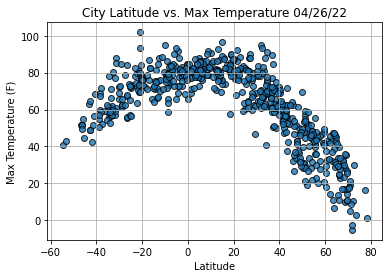

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../Practice/Fig1.png")

# Show plot.
plt.show()

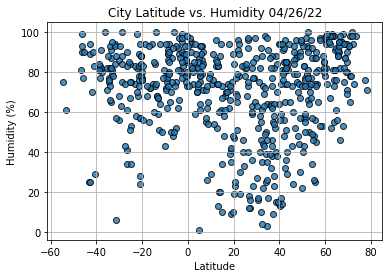

In [40]:
# 6.3.2 - Plot Latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../Practice/Fig2.png")

# Show plot.
plt.show()

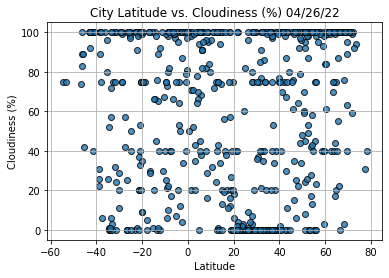

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../Practice/Fig3.png")
# Show plot.
plt.show()

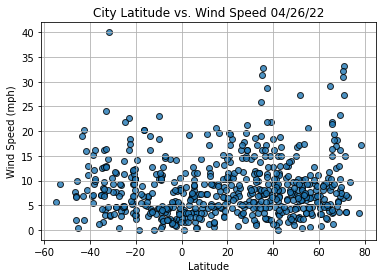

In [44]:
# 6.3.4 - Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../Practice/Fig4.png")
# Show plot.
plt.show()